Loading Required Libraries:

In [ ]:
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import spacy
from transformers import RobertaTokenizer, RobertaModel
from transformers import BertTokenizer, BertModel
from transformers import BertTokenizer, TFBertForSequenceClassification
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import torch

Loading Data and Processing Data:

In [ ]:
# Step 1: Load and Preprocess Data
train_data = pd.read_csv("/content/drive/MyDrive/CSE431/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/CSE431/test.csv")




In [ ]:
train_data.isnull().sum()

text_column     0
label_column    1
dtype: int64

In [ ]:
train_data['label_column'].fillna(1, inplace=True)


In [ ]:
train_data.isnull().sum()

text_column     0
label_column    0
dtype: int64

In [ ]:
# Basic Exploratory Data Analysis (EDA)
print("Number of samples:", len(train_data))
print("Number of unique labels:", train_data['label_column'].nunique())
print("\nClass Distribution:")
print(train_data['label_column'].value_counts())

Number of samples: 7975
Number of unique labels: 2

Class Distribution:
0.0    5112
1.0    2863
Name: label_column, dtype: int64


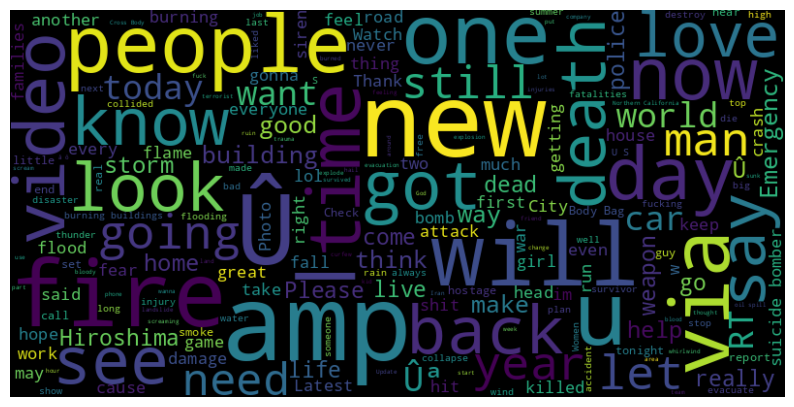

In [ ]:
# Word Cloud for Visualization
all_texts = ' '.join(train_data['text_column'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_texts)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

BERT

In [ ]:
# Step 2: Feature Extraction using BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    tokens = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs['last_hidden_state'].mean(dim=1).squeeze().numpy()

train_data['bert_embeddings'] = train_data['text_column'].apply(get_bert_embeddings)
test_data['bert_embeddings'] = test_data['text_column'].apply(get_bert_embeddings)






tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Step 3: Train and Evaluate SVM and Random Forest
X_train = pd.DataFrame(train_data['bert_embeddings'].to_list())
y_train = train_data['label_column']

X_test = pd.DataFrame(test_data['bert_embeddings'].to_list())
y_test = test_data['label_column']

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_predictions)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)



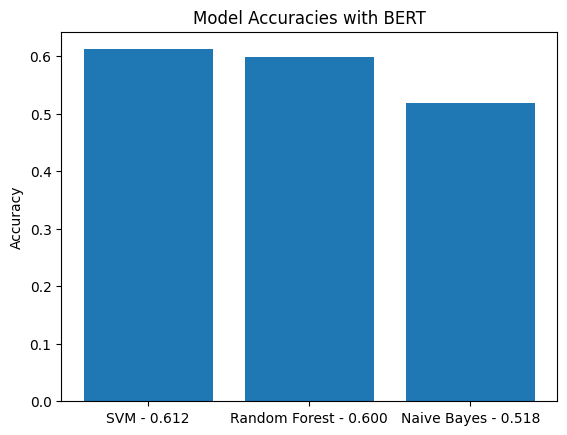

In [ ]:
# Step 4: Plot Accuracy Graphs
models = [f'SVM - {svm_accuracy:.3f}', f'Random Forest - {rf_accuracy:.3f}', f'Naive Bayes - {nb_accuracy:.3f}']
accuracies = [svm_accuracy, rf_accuracy, nb_accuracy]

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracies with BERT')
plt.show()

Spacy

In [ ]:

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Feature Extraction using spaCy
def get_spacy_embeddings(text):
    doc = nlp(text)
    return doc.vector

train_data['spacy_embeddings'] = train_data['text_column'].apply(get_spacy_embeddings)
test_data['spacy_embeddings'] = test_data['text_column'].apply(get_spacy_embeddings)


In [ ]:
# Train and Evaluate SVM, Random Forest, Multinomial Naive Bayes, and Gaussian Naive Bayes with spaCy
X_train = pd.DataFrame(train_data['spacy_embeddings'].to_list())
y_train = train_data['label_column']

X_test = pd.DataFrame(test_data['spacy_embeddings'].to_list())
y_test = test_data['label_column']


In [ ]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_predictions = gnb_model.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)

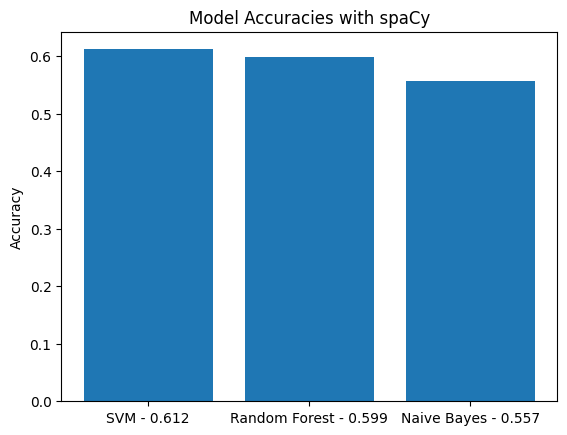

In [ ]:

# Plot Accuracy Graphs
models = [f'SVM - {svm_accuracy:.3f}', f'Random Forest - {rf_accuracy:.3f}', f'Naive Bayes - {gnb_accuracy:.3f}']
accuracies = [svm_accuracy, rf_accuracy, gnb_accuracy]

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracies with spaCy')
plt.show()

Roberta

In [ ]:

# Load RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")


# Feature Extraction using RoBERTa
def get_roberta_embeddings(text):
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs.pooler_output.numpy()

train_data["roberta_embeddings"] = train_data["text_column"].apply(get_roberta_embeddings)
test_data["roberta_embeddings"] = test_data["text_column"].apply(get_roberta_embeddings)




vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train and Evaluate SVM, Random Forest, Gaussian Naive Bayes, and RoBERTa
import numpy as np

X_train = np.squeeze(np.array(X_train))
X_test = np.squeeze(np.array(X_test))

y_train = train_data["label_column"]
y_test = test_data["label_column"]


In [ ]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_predictions = gnb_model.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)

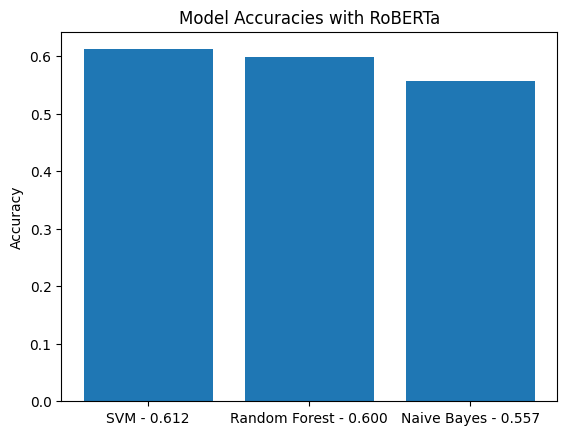

In [ ]:
# Plot Accuracy Graphs
models = [f"SVM - {svm_accuracy:.3f}", f"Random Forest - {rf_accuracy:.3f}", f"Naive Bayes - {gnb_accuracy:.3f}"]
accuracies = [svm_accuracy, rf_accuracy, gnb_accuracy]

plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracies with RoBERTa")
plt.show()

Deep Learning

LSTM

In [ ]:
# Replace 'your_data.csv' with your actual file name
df = pd.read_csv('/content/drive/MyDrive/CSE431/train.csv')

# Label encoding for 'label_column'
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label_column'])

# Train-test split
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Tokenize and pad sequences
max_words = 10000  # Adjust based on your vocabulary size
max_len = 1000  # Adjust based on your sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['text_column'])

X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['text_column']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['text_column']), maxlen=max_len)

y_train = train_data['label']
y_test = test_data['label']


In [ ]:
embedding_dim = 50  # Adjust based on your embedding dimension

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(100))  # Adjust based on the complexity of your task
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
157/157 [==============================] - 203s 1s/step - loss: 0.6406 - accuracy: 0.6474 - val_loss: 0.6385 - val_accuracy: 0.6261
Epoch 2/3
157/157 [==============================] - 148s 940ms/step - loss: 0.5051 - accuracy: 0.7515 - val_loss: 0.6737 - val_accuracy: 0.6369
Epoch 3/3
157/157 [==============================] - 146s 933ms/step - loss: 0.3453 - accuracy: 0.8531 - val_loss: 0.8141 - val_accuracy: 0.6315


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


75/75 [==============================] - 2s 20ms/step
Accuracy: 0.5992478061011283


BERT

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification


# Load train data
train_df = pd.read_csv('/content/drive/MyDrive/CSE431/train.csv')

# Load test data
test_df = pd.read_csv('/content/drive/MyDrive/CSE431/test.csv')

train_df['label_column'].fillna(1, inplace=True)

# Train-test split (if needed, you can skip this step if your test data is already labeled)
train_data, test_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Tokenize and pad sequences using BERT tokenizer
# Tokenize and pad sequences using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

X_train = tokenizer(list(train_data['text_column']), padding=True, truncation=True, return_tensors='tf')
X_test = tokenizer(list(test_data['text_column']), padding=True, truncation=True, return_tensors='tf')

# Extract necessary elements from BatchEncoding
X_train = {key: X_train[key] for key in ['input_ids', 'token_type_ids', 'attention_mask']}
X_test = {key: X_test[key] for key in ['input_ids', 'token_type_ids', 'attention_mask']}

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label_column'])
y_test = label_encoder.transform(test_data['label_column'])

# Load pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
results = model.evaluate(X_test, y_test)
print("Accuracy:", results[1])

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
180/180 [==============================] - 140s 535ms/step - loss: 0.6372 - accuracy: 0.6439 - val_loss: 0.6440 - val_accuracy: 0.6317
Epoch 2/3
180/180 [==============================] - 91s 505ms/step - loss: 0.5963 - accuracy: 0.6747 - val_loss: 0.6472 - val_accuracy: 0.6176
Epoch 3/3
50/50 [==============================] - 12s 173ms/step - loss: 0.6814 - accuracy: 0.6382
Accuracy: 0.6382445096969604


In [ ]:

# Load train data
train_df = pd.read_csv('/content/drive/MyDrive/CSE431/train.csv')

# Load test data
test_df = pd.read_csv('/content/drive/MyDrive/CSE431/test.csv')


# Handle missing values in 'label_column'
train_data = train_data.dropna(subset=['label_column'])
test_data = test_data.dropna(subset=['label_column'])

# Tokenize and pad sequences using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

X_train = tokenizer(list(train_data['text_column']), padding=True, truncation=True, return_tensors='tf')
X_test = tokenizer(list(test_data['text_column']), padding=True, truncation=True, return_tensors='tf')

# Extract necessary elements from BatchEncoding
X_train = {key: X_train[key] for key in ['input_ids', 'token_type_ids', 'attention_mask']}
X_test = {key: X_test[key] for key in ['input_ids', 'token_type_ids', 'attention_mask']}

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label_column'])
y_test = label_encoder.transform(test_data['label_column'])

# Load pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Compile and fine-tune the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

# Evaluate the fine-tuned model on test data
results = model.evaluate(X_test, y_test)
print("Accuracy:", results[1])

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20
314/314 [==============================] - 136s 293ms/step - loss: 0.6372 - accuracy: 0.6534 - val_loss: 0.6612 - val_accuracy: 0.6225
Epoch 2/20
314/314 [==============================] - 89s 284ms/step - loss: 0.5671 - accuracy: 0.6992 - val_loss: 0.6508 - val_accuracy: 0.6512
Epoch 3/20
314/314 [==============================] - 87s 277ms/step - loss: 0.4261 - accuracy: 0.8045 - val_loss: 0.9187 - val_accuracy: 0.6243
Epoch 4/20
314/314 [==============================] - 89s 284ms/step - loss: 0.2326 - accuracy: 0.9090 - val_loss: 1.1793 - val_accuracy: 0.6100
Epoch 5/20
314/314 [==============================] - 87s 278ms/step - loss: 0.1508 - accuracy: 0.9435 - val_loss: 1.3125 - val_accuracy: 0.6064
Epoch 6/20
314/314 [==============================] - 89s 283ms/step - loss: 0.1200 - accuracy: 0.9506 - val_loss: 1.4150 - val_accuracy: 0.6208
Epoch 7/20
314/314 [==============================] - 87s 276ms/step - loss: 0.1025 - accuracy: 0.9604 - val_loss: 1.5405 - val_a

In [ ]:
# Handle missing values in 'label_column'
train_data = train_data.dropna(subset=['label_column'])
test_data = test_data.dropna(subset=['label_column'])

# Tokenize and pad sequences using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

X_train = tokenizer(list(train_data['text_column']), padding=True, truncation=True, return_tensors='tf')
X_test = tokenizer(list(test_data['text_column']), padding=True, truncation=True, return_tensors='tf')

# Extract necessary elements from BatchEncoding
X_train = {key: X_train[key] for key in ['input_ids', 'token_type_ids', 'attention_mask']}
X_test = {key: X_test[key] for key in ['input_ids', 'token_type_ids', 'attention_mask']}

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label_column'])
y_test = label_encoder.transform(test_data['label_column'])

# Load pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Compile and fine-tune the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

# Evaluate the fine-tuned model on test data
results = model.evaluate(X_test, y_test)
print("Accuracy:", results[1])

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
180/180 [==============================] - 140s 541ms/step - loss: 0.6327 - accuracy: 0.6546 - val_loss: 0.6434 - val_accuracy: 0.6301
Epoch 2/3
180/180 [==============================] - 91s 505ms/step - loss: 0.5703 - accuracy: 0.6975 - val_loss: 0.6721 - val_accuracy: 0.6379
Epoch 3/3
50/50 [==============================] - 12s 176ms/step - loss: 0.6873 - accuracy: 0.6621
Accuracy: 0.6620689630508423
